In [2]:
from tensorflow import keras

In [3]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

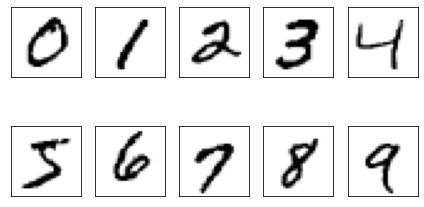

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [5]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [127]:
import numpy as np
np.set_printoptions(linewidth=115)

In [143]:
print(x_train[0][0])

0


In [42]:
for i in range(3):
    print(y_train[i])

5
0
4


In [43]:
# one-hot 벡터 형태로 변환, 인공신경망에서는 이 형태로 데이터 입력
# 예: 2면 [0,0,1,0,0,0,0,0,0,0]
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [44]:
for i in range(3):
    print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [45]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [46]:
x_train = x_train.reshape([60000,28*28])
x_test = x_test.reshape([10000,28*28])

In [47]:
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [48]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation="sigmoid", input_shape=(28*28,)))
model.add(keras.layers.Dense(128, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="sigmoid"))

In [19]:
optimizer = keras.optimizers.SGD(lr=0.1)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8299 - accuracy: 0.7711 - val_loss: 0.6572 - val_accuracy: 0.7991
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6514 - accuracy: 0.7979 - val_loss: 0.6542 - val_accuracy: 0.7740
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6754 - accuracy: 0.7809 - val_loss: 0.6077 - val_accuracy: 0.8065
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6576 - accuracy: 0.7861 - val_loss: 0.8719 - val_accuracy: 0.7033
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6317 - accuracy: 0.7976 - val_loss: 0.6469 - val_accuracy: 0.7911
Epoch 6/20
1875/1875 [==============================] - 2s 864us/step - loss: 0.6163 - accuracy: 0.8008 - val_loss: 0.5956 - val_accuracy: 0.8092
Epoch 7/20
1875/1875 [==============================] - 2s 831us/step - loss: 0.6043 - accuracy: 0.8025 - val_loss: 0.6259 - val_accur

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 834us/step - loss: 0.4624 - accuracy: 0.8518


[0.46238598227500916, 0.8518000245094299]